In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv('Employee.csv')

In [6]:
df.head(10)

,LoginID,OrganizationLevel,JobTitle,BirthDate,MaritalStatus,Gender,VacationHours,SickLeaveHours
0,adventure-works\ken0,NaN,Chief Executive Officer,1969-01-29,S,M,99,69
1,adventure-works\terri0,1.0,Vice President of Engineering,1971-08-01,S,F,1,20
2,adventure-works\roberto0,2.0,Engineering Manager,1974-11-12,M,M,2,21
3,adventure-works\rob0,3.0,Senior Tool Designer,1974-12-23,S,M,48,80
4,adventure-works\rob0,3.0,Senior Tool Designer,1974-12-23,S,M,48,80
5,adventure-works\gail0,3.0,Design Engineer,1952-09-27,M,F,5,22
6,adventure-works\jossef0,3.0,Design Engineer,1959-03-11,M,M,6,23
7,adventure-works\dylan0,3.0,Research and Development Manager,1987-02-24,M,M,61,50
8,adventure-works\diane1,4.0,Research and Development Engineer,1986-06-05,S,F,62,51
9,adventure-works\gigi0,4.0,Research and Development Engineer,1979-01-21,M,F,63,51


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoginID            296 non-null    object 
 1   OrganizationLevel  295 non-null    float64
 2   JobTitle           296 non-null    object 
 3   BirthDate          296 non-null    object 
 4   MaritalStatus      296 non-null    object 
 5   Gender             296 non-null    object 
 6   VacationHours      296 non-null    int64  
 7   SickLeaveHours     296 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 18.6+ KB


In [34]:
df['LoginID'].apply(str)

0          adventure-works\ken0
1        adventure-works\terri0
2      adventure-works\roberto0
3          adventure-works\rob0
4          adventure-works\rob0
                 ...           
291       adventure-works\lynn0
292        adventure-works\amy0
293     adventure-works\rachel0
294        adventure-works\jae0
295     adventure-works\ranjit0
Name: LoginID, Length: 296, dtype: object

In [45]:
split= df['LoginID'].str.split("\\", expand=True)

In [46]:
split

,0,1
0,adventure-works,ken0
1,adventure-works,terri0
2,adventure-works,roberto0
3,adventure-works,rob0
4,adventure-works,rob0
...,...,...
291,adventure-works,lynn0
292,adventure-works,amy0
293,adventure-works,rachel0
294,adventure-works,jae0


In [47]:
df['UserId']=split[1]

In [48]:
df.head()

,LoginID,OrganizationLevel,JobTitle,BirthDate,MaritalStatus,Gender,VacationHours,SickLeaveHours,UserId
0,adventure-works\ken0,NaN,Chief Executive Officer,1969-01-29,S,M,99,69,ken0
1,adventure-works\terri0,1.0,Vice President of Engineering,1971-08-01,S,F,1,20,terri0
2,adventure-works\roberto0,2.0,Engineering Manager,1974-11-12,M,M,2,21,roberto0
3,adventure-works\rob0,3.0,Senior Tool Designer,1974-12-23,S,M,48,80,rob0
4,adventure-works\rob0,3.0,Senior Tool Designer,1974-12-23,S,M,48,80,rob0


In [51]:
df = df.drop('LoginID', axis=1)

In [52]:
df.head()

,OrganizationLevel,JobTitle,BirthDate,MaritalStatus,Gender,VacationHours,SickLeaveHours,UserId
0,NaN,Chief Executive Officer,1969-01-29,S,M,99,69,ken0
1,1.0,Vice President of Engineering,1971-08-01,S,F,1,20,terri0
2,2.0,Engineering Manager,1974-11-12,M,M,2,21,roberto0
3,3.0,Senior Tool Designer,1974-12-23,S,M,48,80,rob0
4,3.0,Senior Tool Designer,1974-12-23,S,M,48,80,rob0


In [54]:
df.dropna(inplace=True)

In [55]:
df.head()

,OrganizationLevel,JobTitle,BirthDate,MaritalStatus,Gender,VacationHours,SickLeaveHours,UserId
1,1.0,Vice President of Engineering,1971-08-01,S,F,1,20,terri0
2,2.0,Engineering Manager,1974-11-12,M,M,2,21,roberto0
3,3.0,Senior Tool Designer,1974-12-23,S,M,48,80,rob0
4,3.0,Senior Tool Designer,1974-12-23,S,M,48,80,rob0
5,3.0,Design Engineer,1952-09-27,M,F,5,22,gail0


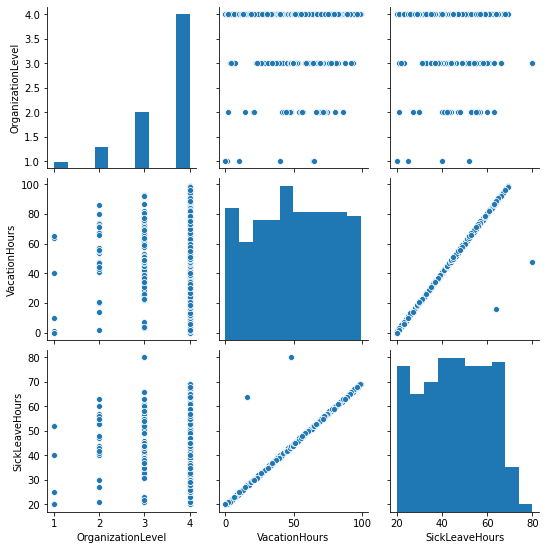

In [57]:
sns.pairplot(df)

Text(0.5, 0, 'GENDER')

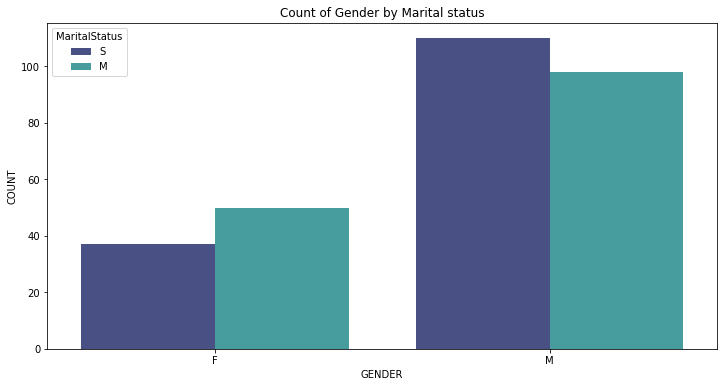

In [76]:
plt.figure(figsize=(12,6))
count = sns.countplot(data=df, x='Gender', hue='MaritalStatus', palette='mako')
count.set_title('Count of Gender by Marital status')
count.set_ylabel('COUNT')
count.set_xlabel('GENDER')

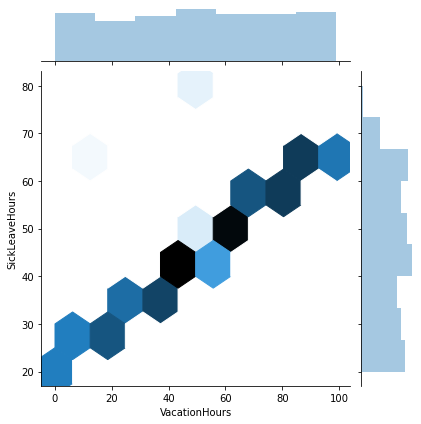

In [80]:
sns.jointplot(data=df, x='VacationHours', y='SickLeaveHours', kind='hex')

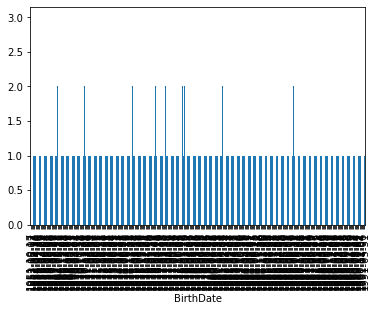

In [87]:
g=df.groupby(by='BirthDate').count()['MaritalStatus'].plot(kind='bar')

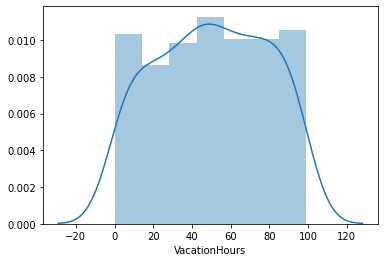

In [88]:
sns.distplot(a=df['VacationHours'])

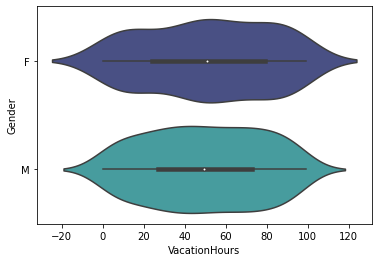

In [90]:
sns.violinplot(data=df, x='VacationHours', y='Gender', palette='mako')